In [141]:
# load the Buehler default dataset

In [3]:
#libraries

import pandas as pd 
import glob
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import seaborn as sns

#load the data
#Pfad Trainingsdaten
path = r'C:\Users\noske\Desktop\Buehler\buehler_data_classification_20220810.tsv'

#Laden der Trainingsdaten
train_data = pd.read_csv(path, header=0 ,sep='\t')

C:\Users\noske\Anaconda3\Lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


AttributeError: module 'numpy' has no attribute 'MachAr'

In [22]:
train_data

,Zyklus_Nummer,Giessrestdicke,Kavitaetsdruck_1nach_t_R0,Kavitaetsdruck_3nach_t_R2,Kavitaetsdruck_5nach_t_R0,Metalldruck_s_CF,Metalldruck_nach_t_R0,max._Metalldruck_ND-Phase,MF-Sensor_S2_nach_t_R0,Ende_Formfuellung,...,fehler,fehler_k1,fehler_k2,fehler_flaeche_grob,fehler_riss,fehler_kaltfluss,fehler_kaltfluss_k1,fehler_kaltfluss_k2,fehler_aufschweissung,fehler_blasen
0,6,15,142,462,548,160,654,714,499,456,...,1,0,1,1,1,1,0,1,0,0
1,7,13,115,425,538,154,653,719,472,455,...,1,1,0,1,1,1,1,0,0,0
2,8,13,127,466,553,157,653,726,503,456,...,1,1,1,1,0,1,1,1,0,0
3,9,13,131,443,552,157,653,720,496,456,...,1,0,1,1,1,1,0,1,0,0
4,10,13,135,469,574,157,652,720,543,456,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,8743,16,246,557,620,149,630,678,525,454,...,1,1,1,1,1,0,0,0,0,0
7978,8744,18,230,571,622,149,631,678,517,453,...,1,1,0,1,0,1,1,0,0,0
7979,8745,15,219,548,608,146,624,674,498,453,...,0,0,0,0,0,0,0,0,0,0
7980,8746,15,214,552,605,147,624,676,502,453,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
##


In [69]:
train_data.iloc[:,69]

0       1
1       1
2       1
3       1
4       0
       ..
7977    0
7978    1
7979    0
7980    0
7981    0
Name: fehler_kaltfluss, Length: 7982, dtype: int64

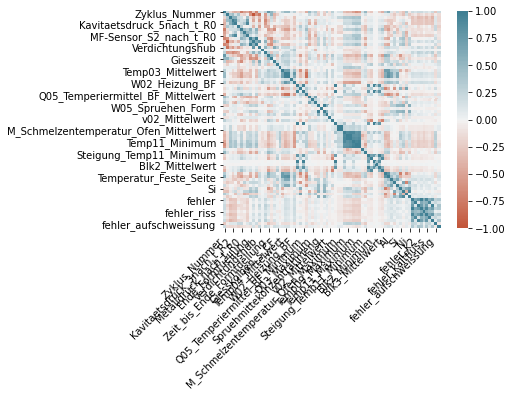

In [24]:
## plot a correlation matrix

corr = train_data.corr()


ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [5]:
#convert data

#Getting an over of the data
train_data = np.array(train_data)
train_data = train_data.astype('float64')

In [6]:
train_data

array([[6.000e+00, 1.500e+01, 1.420e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [7.000e+00, 1.300e+01, 1.150e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [8.000e+00, 1.300e+01, 1.270e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [8.745e+03, 1.500e+01, 2.190e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [8.746e+03, 1.500e+01, 2.140e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [8.747e+03, 1.600e+01, 2.530e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [7]:
# plot Häufigkeit der Fehler

faults = train_data[:,64]

In [8]:
# number of no faults

print("Anzahl Zyklen ohne Fehler")
print(np.sum(faults==0))


Anzahl Zyklen ohne Fehler
4471


In [9]:
# number of faults
print("Anzahl Zyklen mit Fehler")
print(np.sum(faults==1))

Anzahl Zyklen mit Fehler
3511


In [10]:
# number Fläche

faults = train_data[:,67]
print("Anzahl Zyklen mit Fehler Grob")
print(np.sum(faults==1))

Anzahl Zyklen mit Fehler Grob
3467


In [11]:
# number Riss

faults = train_data[:,68]
print("Anzahl Zyklen mit Fehler Riss")
print(np.sum(faults==1))

Anzahl Zyklen mit Fehler Riss
1783


In [12]:
# number Kaltfluss

faults = train_data[:,69]
print("Anzahl Zyklen mit kaltfluss")
print(np.sum(faults==1))

Anzahl Zyklen mit kaltfluss
3148


In [15]:
# number Aufschweissung

faults = train_data[:,72]
print("Anzahl Zyklen mit Aufschweissung")
print(np.sum(faults==1))

Anzahl Zyklen mit Aufschweissung
425


In [14]:
# number Blasen

faults = train_data[:,73]
print("Anzahl Zyklen mit Blasen")
print(np.sum(faults==1))

Anzahl Zyklen mit Blasen
705


In [ ]:
## data export


In [58]:
# Fehler Aufschweißungen
y = train_data.iloc[:,72]

#fehler/kein Fehler
#y = train_data.iloc[:,64]


X = train_data.iloc[:,1:64]

In [59]:
X

,Giessrestdicke,Kavitaetsdruck_1nach_t_R0,Kavitaetsdruck_3nach_t_R2,Kavitaetsdruck_5nach_t_R0,Metalldruck_s_CF,Metalldruck_nach_t_R0,max._Metalldruck_ND-Phase,MF-Sensor_S2_nach_t_R0,Ende_Formfuellung,Ende_Giesshub,...,Blk3_Mittelwert,Temperatur_bewegliche_Seite,Temperatur_Feste_Seite,Al,Zn,Mn,Si,Fe,Cu,Ni
0,15,142,462,548,160,654,714,499,456,464,...,165,185,190,8.76,0.65,0.190,0.038,0.003,0.002,0.000
1,13,115,425,538,154,653,719,472,455,466,...,165,185,190,8.76,0.65,0.190,0.038,0.003,0.002,0.000
2,13,127,466,553,157,653,726,503,456,466,...,165,185,190,8.76,0.65,0.190,0.038,0.003,0.002,0.000
3,13,131,443,552,157,653,720,496,456,466,...,165,185,190,8.76,0.65,0.190,0.038,0.003,0.002,0.000
4,13,135,469,574,157,652,720,543,456,466,...,165,185,190,8.76,0.65,0.190,0.038,0.003,0.002,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,16,246,557,620,149,630,678,525,454,463,...,158,190,200,8.56,0.63,0.203,0.041,0.005,0.003,0.002
7978,18,230,571,622,149,631,678,517,453,461,...,158,190,200,8.56,0.63,0.203,0.041,0.005,0.003,0.002
7979,15,219,548,608,146,624,674,498,453,464,...,158,190,200,8.56,0.63,0.203,0.041,0.005,0.003,0.002
7980,15,214,552,605,147,624,676,502,453,464,...,158,190,200,8.56,0.63,0.203,0.041,0.005,0.003,0.002


In [48]:
# Using Decision Trees: Eeinfache Regeln? Randbedingung

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import tree

regr = DecisionTreeClassifier(max_depth=2)
regr.fit(X, y)


DecisionTreeClassifier(max_depth=2)

[Text(167.4, 181.2, 'X[4] <= 514.5\ngini = 0.325\nsamples = 7982\nvalue = [6352, 1630]'),
 Text(83.7, 108.72, 'X[2] <= 118.5\ngini = 0.485\nsamples = 1448\nvalue = [851, 597]'),
 Text(41.85, 36.23999999999998, 'gini = 0.477\nsamples = 464\nvalue = [182, 282]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.435\nsamples = 984\nvalue = [669, 315]'),
 Text(251.10000000000002, 108.72, 'X[46] <= 411.5\ngini = 0.266\nsamples = 6534\nvalue = [5501, 1033]'),
 Text(209.25, 36.23999999999998, 'gini = 0.246\nsamples = 6358\nvalue = [5447, 911]'),
 Text(292.95, 36.23999999999998, 'gini = 0.425\nsamples = 176\nvalue = [54, 122]')]

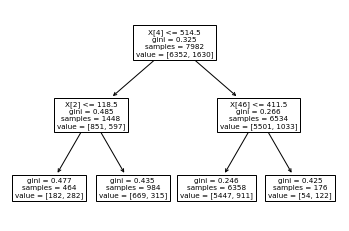

In [53]:
#show tree
tree.plot_tree(regr)

In [54]:
train_data.iloc[:,4]

0       548
1       538
2       553
3       552
4       574
       ... 
7977    620
7978    622
7979    608
7980    605
7981    618
Name: Kavitaetsdruck_5nach_t_R0, Length: 7982, dtype: int64

In [70]:
# load the adapted dataset

In [71]:
#libraries

import pandas as pd 
import glob
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import seaborn as sns

#load the data
#Pfad Trainingsdaten
path = r'C:\Users\noske\Desktop\Buehler\buehler_data_classification_20230601.tsv'

#Laden der Trainingsdaten
train_data = pd.read_csv(path, header=0 ,sep='\t')

In [72]:
train_data

,Zyklus_Nummer,Giessrestdicke,Kavitaetsdruck_1nach_t_R0,Kavitaetsdruck_3nach_t_R2,Kavitaetsdruck_5nach_t_R0,Metalldruck_s_CF,Metalldruck_nach_t_R0,max._Metalldruck_ND-Phase,MF-Sensor_S2_nach_t_R0,Ende_Formfuellung,...,vl_umschalt_sum,vl_p2_umschalt_diff,p_IM_max,p_IM_640bar_col,p_IM_pre_umschalt_max,p_IM_640bar_sum,p_IM_umschalt_sum,p_IM_umschalt_640bar_diff,p_IM_0_col,p_IM_0_640bar_sum
0,6,15,142,462,548,160,654,714,499,456,...,1745.112,1576.917,715,913,183,101353,29888,71465,754,69628
1,7,13,115,425,538,154,653,719,472,455,...,1746.160,1571.920,721,931,181,95752,28259,67493,769,65669
2,8,13,127,466,553,157,653,726,503,456,...,1759.186,1575.834,726,944,183,95976,28696,67280,784,65547
3,9,13,131,443,552,157,653,720,496,456,...,1757.577,1577.243,722,940,182,95568,28547,67021,780,65290
4,10,13,135,469,574,157,652,720,543,456,...,1758.298,1575.392,723,946,181,95657,28564,67093,785,65405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,8743,16,246,557,620,149,630,678,525,454,...,1806.914,1575.223,680,1052,172,102499,27078,75421,882,74034
7978,8744,18,230,571,622,149,631,678,517,453,...,1808.374,1572.498,679,1059,175,106606,27650,78956,888,77516
7979,8745,15,219,548,608,146,624,674,498,453,...,1805.610,1575.339,675,1052,174,99514,27035,72479,881,71208
7980,8746,15,214,552,605,147,624,676,502,453,...,1811.016,1574.619,677,1067,169,102065,26872,75193,894,73814


In [84]:
train_data.iloc[:,64]

0       1
1       1
2       1
3       1
4       0
       ..
7977    1
7978    1
7979    0
7980    0
7981    1
Name: fehler, Length: 7982, dtype: int64

In [87]:
train_data.iloc[:,73]

0       0
1       0
2       0
3       0
4       0
       ..
7977    0
7978    0
7979    0
7980    0
7981    0
Name: fehler_blasen, Length: 7982, dtype: int64

In [102]:
X = train_data.drop(train_data.iloc[:, 64:74],axis = 1)
X = X.drop(X.columns[0],axis = 1)
y = train_data.iloc[:,64]

In [103]:
X

,Giessrestdicke,Kavitaetsdruck_1nach_t_R0,Kavitaetsdruck_3nach_t_R2,Kavitaetsdruck_5nach_t_R0,Metalldruck_s_CF,Metalldruck_nach_t_R0,max._Metalldruck_ND-Phase,MF-Sensor_S2_nach_t_R0,Ende_Formfuellung,Ende_Giesshub,...,vl_umschalt_sum,vl_p2_umschalt_diff,p_IM_max,p_IM_640bar_col,p_IM_pre_umschalt_max,p_IM_640bar_sum,p_IM_umschalt_sum,p_IM_umschalt_640bar_diff,p_IM_0_col,p_IM_0_640bar_sum
0,15,142,462,548,160,654,714,499,456,464,...,1745.112,1576.917,715,913,183,101353,29888,71465,754,69628
1,13,115,425,538,154,653,719,472,455,466,...,1746.160,1571.920,721,931,181,95752,28259,67493,769,65669
2,13,127,466,553,157,653,726,503,456,466,...,1759.186,1575.834,726,944,183,95976,28696,67280,784,65547
3,13,131,443,552,157,653,720,496,456,466,...,1757.577,1577.243,722,940,182,95568,28547,67021,780,65290
4,13,135,469,574,157,652,720,543,456,466,...,1758.298,1575.392,723,946,181,95657,28564,67093,785,65405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,16,246,557,620,149,630,678,525,454,463,...,1806.914,1575.223,680,1052,172,102499,27078,75421,882,74034
7978,18,230,571,622,149,631,678,517,453,461,...,1808.374,1572.498,679,1059,175,106606,27650,78956,888,77516
7979,15,219,548,608,146,624,674,498,453,464,...,1805.610,1575.339,675,1052,174,99514,27035,72479,881,71208
7980,15,214,552,605,147,624,676,502,453,464,...,1811.016,1574.619,677,1067,169,102065,26872,75193,894,73814


In [95]:
y

0       1
1       1
2       1
3       1
4       0
       ..
7977    1
7978    1
7979    0
7980    0
7981    1
Name: fehler, Length: 7982, dtype: int64

In [119]:
# timeseries 

In [137]:

timeseries_dataframe = pd.read_pickle(r"C:\Users\noske\Desktop\Buehler\timeseries_zdg.pkl")

#timeseries_dataframe = pd.read_pickle(r"C:\Users\noske\Desktop\Buehler\db_dump.pkl")



#print(timeseries.query('id == 35'))

In [138]:
timeseries_dataframe

,id,time,sl,vl,p_IM,p_s2,p_Cav1,p_Cav3,p_Cav4,p_cav5
0,6,0,76.0,0.555,7.0,0.0,8.0,9.0,1.0,0.0
1,6,1,76.0,0.555,7.0,0.0,8.0,9.0,1.0,0.0
2,6,2,76.0,0.555,5.0,0.0,8.0,9.0,1.0,0.0
3,6,3,76.0,0.559,6.0,0.0,8.0,9.0,1.0,0.0
4,6,4,76.0,0.559,5.0,0.0,8.0,9.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
16005920,8747,1992,461.0,0.000,630.0,418.0,241.0,613.0,818.0,455.0
16005921,8747,1993,461.0,0.000,628.0,418.0,241.0,613.0,818.0,453.0
16005922,8747,1994,461.0,0.000,630.0,417.0,241.0,613.0,818.0,453.0
16005923,8747,1995,461.0,0.000,630.0,417.0,241.0,613.0,818.0,453.0


In [136]:
print("timeseries_dataframe", list(timeseries_dataframe.columns))

timeseries_dataframe ['id', 'time', '01_Temp01', '02_Temp02', '03_Temp03', '04_Temp04', '05_Temp05', '06_Temp06', '07_dP01', '08_dP02', '09_dP03', '10_dP04', '11_Temp07', '12_Rf01', '13_V01', '14_Temp08', '15_Rf02', '16_V02', '17_Temp09', '18_Temp10', '19_Temp11', '20_Lubi01', '21_Q01', '22_Q02', '23_Blk1', '24_Blk2', '25_Blk3', '26_Blk4', '27_M', '28_Masse_Ofen', '29_Temp12', '30_Temp13', '31_Q03', 'Kolbenschmierzeit', 'Sprühzeit', 'Mischungsverhältnis', 'spez._Q_Sprühmittelkonzentrat', 'Temperiermittelmenge_FF', 'Temperiermittelmenge_BF', 'P01_Heizung_FF', 'P02_Heizung_BF', 'P03_Kühlung_Giesskolben', 'P04_Wasser_Kühlung_total', 'P05_Sprühen_Form', 'Differenz_Temp10/Temp11', 'Steigung_Temp09', 'Steigung_Temp10', 'Steigung_Temp11']


In [121]:
#rename the columns

ts_rename_map = {"01_Temp01": "Temp01", "02_Temp02": "Temp02", "03_Temp03": "Temp03", "04_Temp04": "Temp04", "05_Temp05": "Temp05", "06_Temp06": "Temp06", "07_dP01": "dp01_07", "08_dP02": "dp02_08", "09_dP03": "dp03_09", "10_dP04": "dp04_10", "11_Temp07": "Temp07_11", "12_Rf01": "Rf01_12", "13_V01": "V01_13", "14_Temp08": "Temp08_14", "15_Rf02": "Rf02_15", "16_V02": "V02_16", "17_Temp09": "Temp09_17", "18_Temp10": "Temp10_18", "19_Temp11": "Temp11_19", "20_Lubi01": "Lubi01_20", "21_Q01": "Q01_21", "22_Q02": "Q02_22", "23_Blk1": "Blk1_23", "24_Blk2": "Blk2_24", "25_Blk3": "Blk3_25", "26_Blk4": "Blk4_26", "27_M": "M_27", "28_Masse_Ofen": "Masse_Ofen_28", "29_Temp12": "Temp12_29", "30_Temp13": "Temp13_30", "31_Q03": "Q03_31", "spez._Q_Sprühmittelkonzentrat": "spez_Sprühmittelkonzentrat", "Differenz_Temp10/Temp11": "Differenz_Temp10Temp11"}
timeseries_dataframe.rename(columns=ts_rename_map, inplace=True)
print("timeseries_dataframe", list(timeseries_dataframe.columns))



timeseries_dataframe ['id', 'time', 'Temp01', 'Temp02', 'Temp03', 'Temp04', 'Temp05', 'Temp06', 'dp01_07', 'dp02_08', 'dp03_09', 'dp04_10', 'Temp07_11', 'Rf01_12', 'V01_13', 'Temp08_14', 'Rf02_15', 'V02_16', 'Temp09_17', 'Temp10_18', 'Temp11_19', 'Lubi01_20', 'Q01_21', 'Q02_22', 'Blk1_23', 'Blk2_24', 'Blk3_25', 'Blk4_26', 'M_27', 'Masse_Ofen_28', 'Temp12_29', 'Temp13_30', 'Q03_31', 'Kolbenschmierzeit', 'Sprühzeit', 'Mischungsverhältnis', 'spez_Sprühmittelkonzentrat', 'Temperiermittelmenge_FF', 'Temperiermittelmenge_BF', 'P01_Heizung_FF', 'P02_Heizung_BF', 'P03_Kühlung_Giesskolben', 'P04_Wasser_Kühlung_total', 'P05_Sprühen_Form', 'Differenz_Temp10Temp11', 'Steigung_Temp09', 'Steigung_Temp10', 'Steigung_Temp11']


In [141]:
id_query_1 = timeseries_dataframe.query('id == 6')
time_1 = id_query_1.time
pressure_1 = id_query_1.p_Cav1

id_query_2 = timeseries_dataframe.query('id == 665')
time_2 = id_query_2.time
pressure_2 = id_query_2.p_Cav1

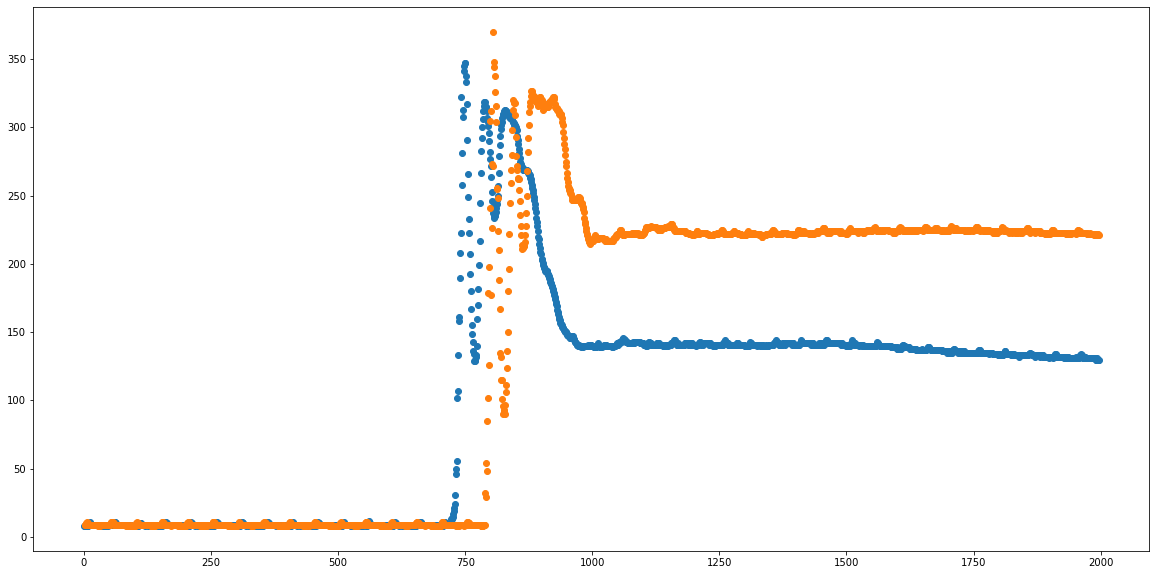

In [142]:
from matplotlib.pyplot import figure

figure(figsize=(20, 10))

plt.scatter(time_1, pressure_1)
plt.scatter(time_2, pressure_2)